## Machine Learning Nano Degree - Udacity

## Project: Chest X-Ray Image classifcation ( capstone Project)

---

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Dataset and import libraries
* [Step 1](#step1): Dataset Pre-Processing
* [Step 2](#step2): Data Exploration (Visualization and Statistics)
* [Step 3](#step3): More Pre-processing
* [Step 4](#step4): Create a BenchMark Model (2 Layers CNN)
* [Step 5](#step5): Create a more complex CNN Model 
* [Step 6](#step6): Create even more complex CNN Model
* [Step 8](#step8): Testing and comparing 

<a id='step0'></a>
## Step 0: Download Dataset and import libraries

### Download  Dataset

In the code cell below, "wget" command is used to download the dataset from kaggle, as all the work is done on Google Cloud
This was done possible thanks to Google Chrome Extention [CurlWget](https://chrome.google.com/webstore/detail/curlwget/jmocjfidanebdlinpbcdkcmgdifblncg?hl=en)


In [2]:
#!wget --header='Host: storage.googleapis.com' --header='User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36' --header='Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' --header='Accept-Language: en-US,en;q=0.9,ar;q=0.8' --header='Referer: https://www.kaggle.com/' 'https://storage.googleapis.com/kaggle-datasets/17810/23812/chest-xray-pneumonia.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1552439468&Signature=h%2FZbl7MsQReI9qDHTznpj7PsE%2FnZeOJucVjEbi4GO5QHr%2FfWEA8hH4QeTNFTzkCd2iYdJ%2FNKNXyx2BsakkDHQUXjEGgpE1UI2pj9%2Bq1DB3NhmlEEoFXdzWBjiW0EFHAcCJqY0pIb660dkQxHnyI8%2FMzf%2Fi1kbi3fIX%2FR8V5%2BHOfxnoi8Z7T7P%2FG9jqFpopsAZKHD6oMUm%2FyCcwjMvWnao3nmfZc6kEw2hZCQclLapTLSOh3yyzuekMQuwbY70W%2BT4yK7IgZCoS9TijCQ6IoQO3B4VbU3VLLs2mrRqqT8l6XL1t%2FZ7rTTDClHLCslDz5egB4fn0M3JidHtMA%2BFRufJA%3D%3D' -O 'chest-xray-pneumonia.zip' -c

### Import all the Iibraries used
Note that there is a comment beside each library explaining why it is used in this project

In [3]:
import requests # This library is used to make requests to internet
import zipfile # to unzip the dataset
import random # to have a constant random feed
import requests # This library is used to make requests to internet
import zipfile # to unzip the dataset
import glob # Get images paths to be in a list

import numpy as np # to work with arrays and matrices
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import cv2    ## image manipulation      
                
from PIL import ImageFile                            
import seaborn as sns # visualization
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt # for plotting purposes

import random # to have a constant random feed

from pathlib import Path ## To have the path of all the directories

from sklearn.metrics import confusion_matrix

import tensorflow as tf

## keras imports
from keras.models import load_model
from keras import  metrics
from keras.utils import np_utils 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,Flatten,SeparableConv2D,BatchNormalization
from keras.layers import Activation, Dropout, Dense
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image  
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint  
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.utils import np_utils 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

The following code cell decompress the dataset. This code is inspired by [this](https://stackoverflow.com/questions/45261190/how-to-get-kaggle-competition-data-via-command-line-on-virtual-machine) answer on stackoverflow.

Please, run it only once !

In [4]:
'''
zip_ref = zipfile.ZipFile('chest-xray-pneumonia.zip', 'r')
zip_ref.extractall()
zip_f = zipfile.ZipFile('chest_xray.zip','r')
zip_f.extractall()
zip_f.close()
'''

"\nzip_ref = zipfile.ZipFile('chest-xray-pneumonia.zip', 'r')\nzip_ref.extractall()\nzip_f = zipfile.ZipFile('chest_xray.zip','r')\nzip_f.extractall()\nzip_f.close()\n"

In [5]:
# load train, test, and validation datasets directories
train_files_dir = Path("chest_xray/train")
test_files_dir = Path("chest_xray/test")
valid_files_dir = Path("chest_xray/val")

## More directories of the datasest

train_normal_dir = train_files_dir / "NORMAL"
train_ill_dir    = train_files_dir / "PNEUMONIA"
test_normal_dir = test_files_dir / "NORMAL"
test_ill_dir    = test_files_dir / "PNEUMONIA"
valid_normal_dir = valid_files_dir / "NORMAL"
valid_ill_dir    = valid_files_dir / "PNEUMONIA"

<a id='step1'></a>
## Step 1: Data Pre-Processing

### Attach each example to its category


In [6]:
## Label the images as 0 or 1
def label_data(images_paths,label):
    image_arr = []
    for im_path in images_paths:
        image_arr.append((im_path,label))
    return image_arr

## use glob to have an array with all the images paths
train_normal_images = (glob.glob(str(train_normal_dir)+'/*.jpeg'))
train_ill_images = (glob.glob(str(train_ill_dir)+'/*.jpeg'))
test_normal_images = (glob.glob(str(test_normal_dir)+'/*.jpeg'))
test_ill_images = (glob.glob(str(test_ill_dir)+'/*.jpeg'))
valid_normal_images = (glob.glob(str(valid_normal_dir)+'/*.jpeg'))
valid_ill_images = (glob.glob(str(valid_ill_dir)+'/*.jpeg'))


# append each subdataset to its corresponding label

train_n_arr = label_data(train_normal_images,0)
train_i_arr = label_data(train_ill_images,1)
test_n_arr = label_data(test_normal_images,0)
test_i_arr = label_data(test_ill_images,1)
valid_n_arr = label_data(valid_normal_images,0)
valid_i_arr = label_data(valid_ill_images,1)

# Add the 2 subdatasets for train,test, and validation
train_arr = train_n_arr + train_i_arr
test_arr = test_n_arr + test_i_arr
valid_arr = valid_n_arr + valid_i_arr

### Convert the numpy arrays into Panda dataframe 

In [7]:
## convert into panda dataframe to have to columns instead of arrays 'this would be useful in next steps

train_df = pd.DataFrame(train_arr, columns=['image', 'label'],index=None)

test_df = pd.DataFrame(test_arr, columns=['image', 'label'],index=None)
valid_df = pd.DataFrame(valid_arr, columns=['image', 'label'],index=None)

# shaffle the datasets so they are not sorted
train_df = train_df.sample(frac=1.).reset_index(drop=True)
test_df = test_df.sample(frac=1.).reset_index(drop=True)
valid_df = valid_df.sample(frac=1.).reset_index(drop=True)

<a id='step2'></a>
## Step 2: Data Exploration (Visualization and Statistics)

### Data Exploratory 
Print the head of each dataframe

In [8]:
## print statstics about the data
print(train_df.head())
print(test_df.head())
print(valid_df.head())


                                               image  label
0  chest_xray/train/PNEUMONIA/person1857_bacteria...      1
1          chest_xray/train/NORMAL/IM-0420-0001.jpeg      0
2  chest_xray/train/PNEUMONIA/person9_bacteria_39...      1
3  chest_xray/train/PNEUMONIA/person1668_bacteria...      1
4  chest_xray/train/PNEUMONIA/person1361_virus_23...      1
                                               image  label
0   chest_xray/test/NORMAL/NORMAL2-IM-0332-0001.jpeg      0
1  chest_xray/test/PNEUMONIA/person81_bacteria_39...      1
2   chest_xray/test/NORMAL/NORMAL2-IM-0282-0001.jpeg      0
3  chest_xray/test/PNEUMONIA/person86_bacteria_42...      1
4  chest_xray/test/PNEUMONIA/person147_bacteria_7...      1
                                               image  label
0  chest_xray/val/PNEUMONIA/person1954_bacteria_4...      1
1    chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg      0
2  chest_xray/val/PNEUMONIA/person1946_bacteria_4...      1
3    chest_xray/val/NORMAL/NORMAL2-IM-14

### Print Statistics about the data

In [9]:
print('There are',len(train_arr+test_arr+valid_arr), 'images in the dataset')
print('There are',len(train_arr),'Training images with',len(train_n_arr),'Healthy X-Rays and',len(train_i_arr),'Sick X-Rays')
print('There are',len(test_arr),'Testing images with',len(test_n_arr),'Healthy X-Rays and',len(test_i_arr),'Sick X-Rays')
print('There are',len(valid_arr),'Validation images with',len(valid_n_arr),'Healthy X-Rays and',len(valid_i_arr),'Sick X-Rays')

There are 5856 images in the dataset
There are 5216 Training images with 1341 Healthy X-Rays and 3875 Sick X-Rays
There are 624 Testing images with 234 Healthy X-Rays and 390 Sick X-Rays
There are 16 Validation images with 8 Healthy X-Rays and 8 Sick X-Rays


#### It is clear that the dataset is unbalanced. One way to solve this is to augment the data, which will always be benefial for CNN.

### Data Visualization

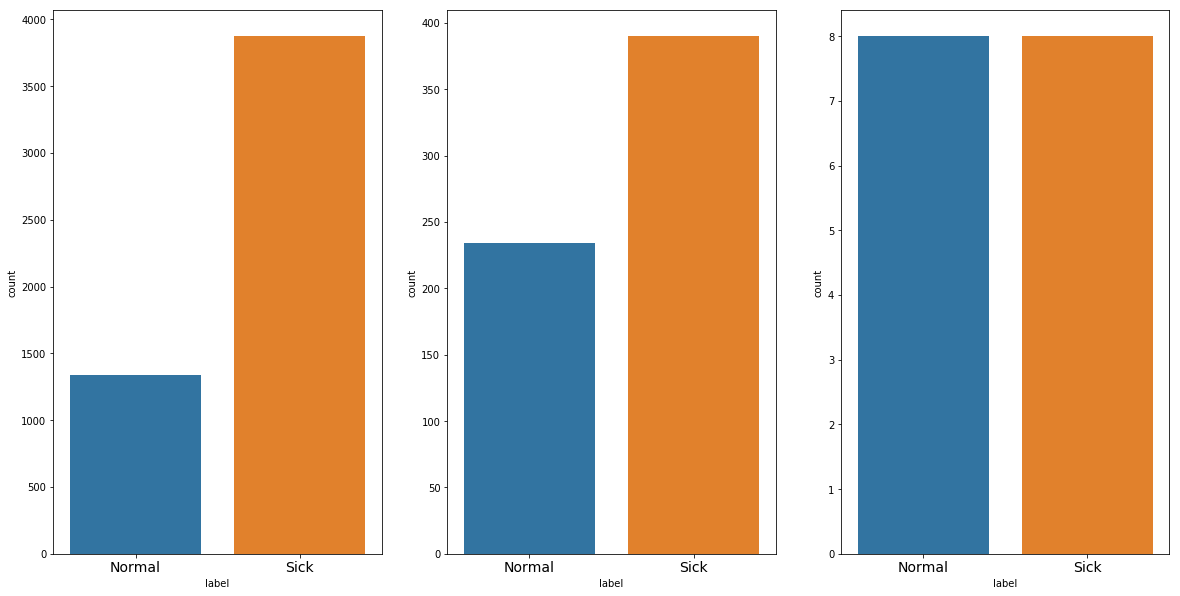

In [10]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(1,3,1)
sns.countplot(x="label", data=train_df)

ax2 = fig.add_subplot(1,3,2)
sns.countplot(x="label", data=test_df)

ax3 = fig.add_subplot(1,3,3)
sns.countplot(x="label", data=valid_df)

sns.set(style="darkgrid")
fig.set_figheight(10)
fig.set_figwidth(20)
ax1.set_xticklabels(labels = ['Normal',"Sick"], fontsize=14)
ax2.set_xticklabels(labels = ['Normal',"Sick"], fontsize=14)
ax3.set_xticklabels(labels = ['Normal',"Sick"], fontsize=14)

plt.show()

#### it confirms our statistical analysis that the dataset is unbalanced.


### Plot the first few images from the Training set (Normal and Sick)

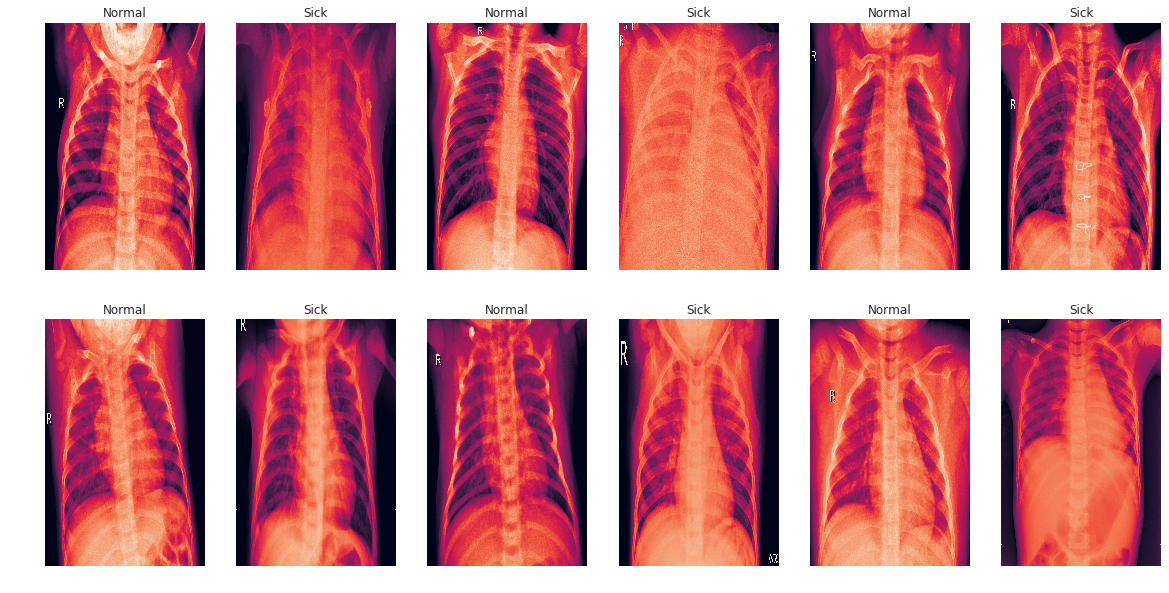

In [11]:
fig = plt.figure()

for i in range(1,13,2):
    ax1 = fig.add_subplot(2,6,i)
    ax2 = fig.add_subplot(2,6,i+1)
    img1 =  mpimg.imread(train_normal_images[i])
    img2 =  mpimg.imread(train_ill_images[i])
    ax1.imshow(img1)
    ax2.imshow(img2)
    ax1.set_title("Normal")
    ax2.set_title("Sick")
    ax1.axis('off')
    ax1.set_aspect('auto')
    ax2.axis('off')
    ax2.set_aspect('auto')
    
fig.set_figheight(10)
fig.set_figwidth(20)

#### The images vary in size (if we don't set aspect ratio to 'auto' in plotting paramters. Also, the images are RGB (which would be an over head for our model as it would require much more paramters.
#### Therefore, we will convert all the images to Graylevel, Resize them to be (128,128) and normalize them so the model converges faster.

<a id='step3'></a>
## Step 3: More Data Pre-Processing

    1. Append all the dataset into one data frame
    2. Loop through the images and resize all of them to be (256,256)
    3. Normalize all the images by dividing each one by 255 to have pixels values from 0 to 1. This would help reducing the weights.
    4.Perform basic data augmentation by flipping the images from left to right so the dataset would double from 5,800 to nearly 1,100.
    5.Encode the label of each image by using one hot encoding.
    6.Split the dataset to be a training sub-dataset and test sub-dataset, with a ratio of 75% to 25%, thus getting rid of the imbalance problem of the different sub-dataset in the beginning.


In [12]:
## image rescaling and augmenting  
def gray_resize_normalize(img):
    img_gray = cv2.imread(img)
    im_gray_resized = cv2.resize(img_gray,(128,128))
    im_gray_resized = im_gray_resized.astype(np.float32)/255.
    new_gray_resized = np.fliplr(im_gray_resized)
    return im_gray_resized,new_gray_resized

## final preprocessing for the dataset 
## take the dataframe and return the encoded label and the processed image array.
def get_data_and_labels(dataframe):
    returned_data =[]
    returned_labels =[]
    labels = dataframe['label']
    imgs = dataframe['image']
    for l,i in zip(labels,imgs): # l for labels and i for images
        proc,proc_aug = gray_resize_normalize(i)
        returned_data.append(proc)
        returned_data.append(proc_aug)
        if l ==1:
            encoded_label = to_categorical(1, num_classes=2)
            returned_labels.append(encoded_label)
            returned_labels.append(encoded_label)
        elif l==0:
            encoded_label = to_categorical(0, num_classes=2)
            returned_labels.append(encoded_label)
            returned_labels.append(encoded_label)

    return returned_data,returned_labels

In [13]:
## Final Preprocessed Data and Labels 
## Might take a while ..
dataset_df = train_df.append(test_df)
dataset_df = dataset_df.append(valid_df)
dataset_df = dataset_df.sample(frac=1.).reset_index(drop=True)

dataset_data,dataset_labels = get_data_and_labels(dataset_df)  
  

In [14]:
train_data, test_data,train_labels, test_labels = train_test_split(dataset_data, dataset_labels, random_state = 101, 
                                                   test_size=0.25)
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels= np.array(train_labels)
test_labels =  np.array(test_labels)


In [15]:
(np.array(train_data).shape)

(8784, 128, 128, 3)

<a id='step4'></a>
## Step 4: BenchMark Model


###  Model Architecture

In [16]:
def bench_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=( 128, 128,3)))
    model.add(Activation('relu'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                metrics=[ metrics.categorical_accuracy])
    model.summary()
    return model

#### helper function to use k-fold cross validation

In [17]:
early_stopping = EarlyStopping(monitor='categorical_accuracy', patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('bench_model.h5', verbose=1, save_best_only=True)

#define a function to fit the model
def fit_and_evaluate(train_data, val_data, train_labels, val_labels,m, EPOCHS=20, BATCH_SIZE=128):
    model = None
    model = m
    results = model.fit(train_data, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping, model_checkpoint], 
              verbose=1, validation_split=0.1)  
    print("Val Score: ", model.evaluate(val_data, val_labels))
    return results

### Train the benchMark Model

In [18]:
n_folds=3
epochs=30
batch_size=128
#save the model history in a list after fitting so that we can plot later
model_history = [] 
for i in range(n_folds):
    print("Training on Fold: ",i+1)
    td, vd, tl, vl = train_test_split(train_data, train_labels, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(td, vd, tl, vl,bench_model(), epochs, batch_size))
    print("======="*12, end="\n\n\n")
    

Training on Fold:  1
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 962
Trainable params: 962
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Tra

### Load the Model with the Best Validation Loss

In [19]:
model = load_model('bench_model.h5')

### Test the Model

#### Helper function to test any model

In [20]:
def test_model():
    preds = model.predict(test_data, batch_size=16)
    preds = np.argmax(preds, axis=-1)
    orig_test_labels = np.argmax(test_labels, axis=-1)
    tn = tp = fp = fn = 0
    for i in range(len(test_data)):
        if preds[i] ==1:
            if orig_test_labels[i] == 1:
                tp = tp +1
            elif orig_test_labels[i] == 0:
                fp = fp +1
        if preds[i] ==0:
            if orig_test_labels[i] == 1:
                fn = fn +1
            elif orig_test_labels[i] == 0:
                tn = tn +1
    recall = tp/(tp+fp)
    precision = tp/(tp + fn)
    accuracy = (tp + tn)/len(test_data)
    print('Number of Test set input with TP is',tp)
    print('Number of Test set input with TN is',tn)
    print('Number of Test set input with FP is',fp)
    print('Number of Test set input with FN is',fn)
    print("Recall is",recall)
    print("precision is",precision)
    print("accuracy is",accuracy)
    conf_matx = confusion_matrix(orig_test_labels, preds)
    heatmap = sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Number of Test set input with TP is 2125
Number of Test set input with TN is 0
Number of Test set input with FP is 803
Number of Test set input with FN is 0
Recall is 0.7257513661202186
precision is 1.0
accuracy is 0.7257513661202186


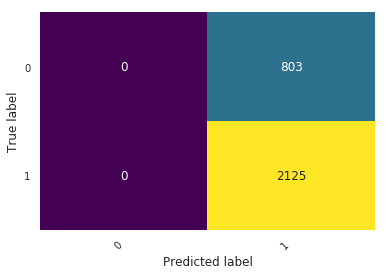

In [21]:
test_model()

### Visualization

#### Helper function to visualize the results of any  model

In [22]:
def model_vis():
    plt.title('Accuracies vs Epochs')
    for i in range(n_folds):
        plt.plot(model_history[i].history['categorical_accuracy'], label='Training Fold '+str(i+1))
    plt.legend()
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.show()
    
    for i in range(n_folds):
        plt.title('Train Accuracy vs Val Accuracy')
        plt.plot(model_history[i].history['categorical_accuracy'], label='Train Accuracy Fold '+ str(i+1))
        plt.plot(model_history[i].history['val_categorical_accuracy'], label='Val Accuracy Fold'+str(i+1), linestyle = "dashdot")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

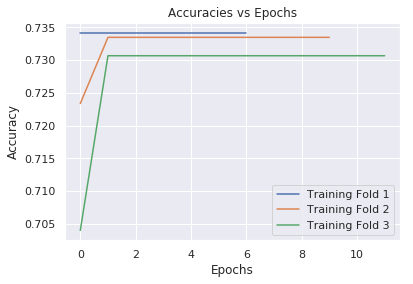

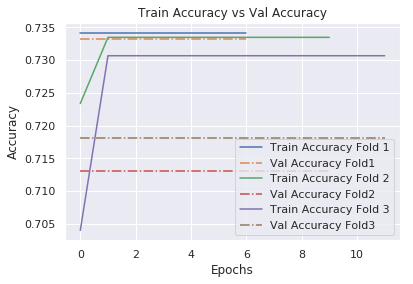

In [23]:
model_vis()

<a id='step5'></a>
## Step 5: First Model


###  Model Architecture

In [24]:
def first_model():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size = 3,padding = 'same',activation = 'relu',input_shape = (128,128,3)))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr = 0.0001, decay = 0.03),
                metrics=[ metrics.categorical_accuracy])
    model.summary()
    return model

### Train the first model

In [25]:
early_stopping = EarlyStopping(monitor='categorical_accuracy', patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('first_model.h5', verbose=1, save_best_only=True)
n_folds=3
epochs=30
batch_size=128
#save the model history in a list after fitting so that we can plot later
model_history = [] 
for i in range(n_folds):
    print("Training on Fold: ",i+1)
    td, vd, tl, vl = train_test_split(train_data, train_labels, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(td, vd, tl, vl,first_model(), epochs, batch_size))
    print("======="*12, end="\n\n\n")
    

Training on Fold:  1
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       73856     
______

### Load the Model with the Best Validation Loss

In [26]:
model = load_model('first_model.h5')

### Test the Model

Number of Test set input with TP is 2125
Number of Test set input with TN is 0
Number of Test set input with FP is 803
Number of Test set input with FN is 0
Recall is 0.7257513661202186
precision is 1.0
accuracy is 0.7257513661202186


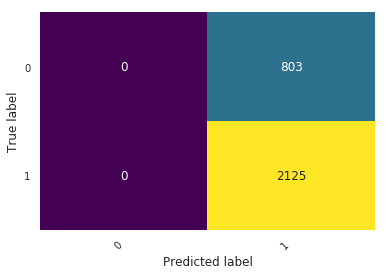

In [27]:
test_model()

### Visualization

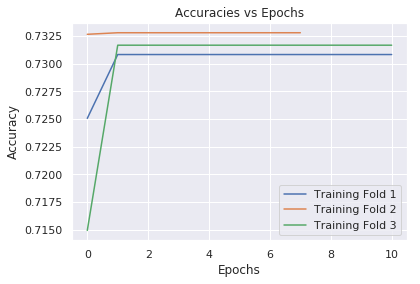

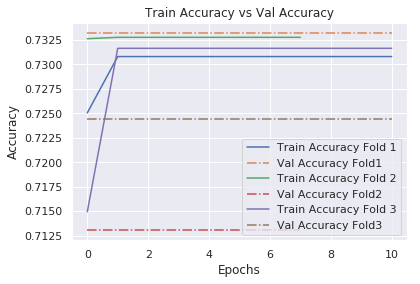

In [28]:
model_vis()

<a id='step6'></a>
## Step 6: Second Model

###  Model Architecture

In [29]:
def second_model():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size = 3,padding = 'same',activation = 'relu',input_shape = (128,128,3)))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    
    model.add(SeparableConv2D(filters=256, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(SeparableConv2D(filters=256, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr = 0.0001, decay = 0.03),
                metrics=[ metrics.categorical_accuracy])
    model.summary()
    return model

### Train the seocond model

In [30]:
early_stopping = EarlyStopping(monitor='categorical_accuracy', patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('second_model.h5', verbose=1, save_best_only=True)
n_folds=3
epochs=30
batch_size=128
#save the model history in a list after fitting so that we can plot later
model_history = [] 
for i in range(n_folds):
    print("Training on Fold: ",i+1)
    td, vd, tl, vl = train_test_split(train_data, train_labels, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(td, vd, tl, vl,second_model(), epochs, batch_size))
    print("======="*12, end="\n\n\n")
    


Training on Fold:  1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        

### Load the Model with the Best Validation Loss

In [31]:
model = load_model('second_model.h5')

### Test the Model

Number of Test set input with TP is 2058
Number of Test set input with TN is 737
Number of Test set input with FP is 66
Number of Test set input with FN is 67
Recall is 0.9689265536723164
precision is 0.9684705882352941
accuracy is 0.9545765027322405


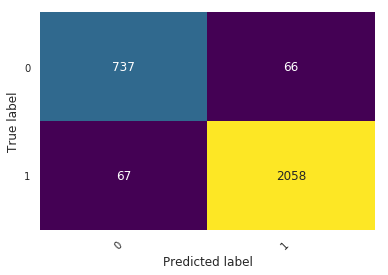

In [32]:
test_model()

### Visualization

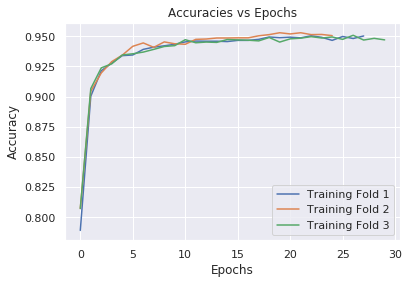

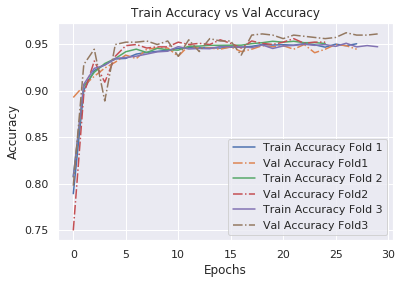

In [33]:
model_vis()

## Free-Form Visualization

### Same steps are followed

In [38]:

zip_f = zipfile.ZipFile('web.zip','r')
zip_f.extractall()
zip_f.close()


In [55]:
web_dir = Path("web")

## More directories of the datasest

web_normal_dir = web_dir / "NORMAL"
web_ill_dir    = web_dir / "PNEUMONIA"


## use glob to have an array with all the images paths
web_normal_images = (glob.glob(str(web_normal_dir)+'/*'))
web_ill_images = (glob.glob(str(web_ill_dir)+'/*'))
web_images = web_normal_images +web_ill_images
web_normal_arr = label_data(web_normal_images,0)
web_ill_arr = label_data(web_ill_images,1)

web_arr = web_normal_arr + web_ill_arr

In [56]:
web_df = pd.DataFrame(web_arr, columns=['image', 'label'],index=None)

web_df = web_df.sample(frac=1.).reset_index(drop=True)
web_df.head()


,image,label
0,web/NORMAL/n_4.jpg,0
1,web/PNEUMONIA/i_3.jpg,1
2,web/PNEUMONIA/i_2.jpg,1
3,web/PNEUMONIA/i_4.jpg,1
4,web/NORMAL/n_1.jpg,0


In [90]:
web_data,web_labels = get_data_and_labels(web_df)  
web_data = np.array(web_data)
web_labels = np.array(web_labels)

Number of Test set input with TP is 8
Number of Test set input with TN is 6
Number of Test set input with FP is 2
Number of Test set input with FN is 0
Recall is 0.8
precision is 1.0
accuracy is 0.0047814207650273225


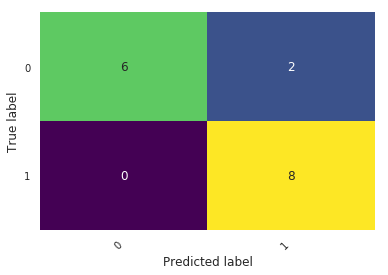

In [82]:
preds = model.predict(web_data)
preds = np.argmax(preds, axis=-1)
orig_test_labels = np.argmax(web_labels, axis=-1)
tn = tp = fp = fn = 0
for i in range(len(web_data)):
    if preds[i] ==1:
        if orig_test_labels[i] == 1:
            tp = tp +1
        elif orig_test_labels[i] == 0:
            fp = fp +1
    if preds[i] ==0:
        if orig_test_labels[i] == 1:
            fn = fn +1
        elif orig_test_labels[i] == 0:
            tn = tn +1
recall = tp/(tp+fp)
precision = tp/(tp + fn)
accuracy = (tp + tn)/len(test_data)
print('Number of Test set input with TP is',tp)
print('Number of Test set input with TN is',tn)
print('Number of Test set input with FP is',fp)
print('Number of Test set input with FN is',fn)
print("Recall is",recall)
print("precision is",precision)
print("accuracy is",accuracy)
conf_matx = confusion_matrix(orig_test_labels, preds)
heatmap = sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

0
1
2
3
4
5
6
7


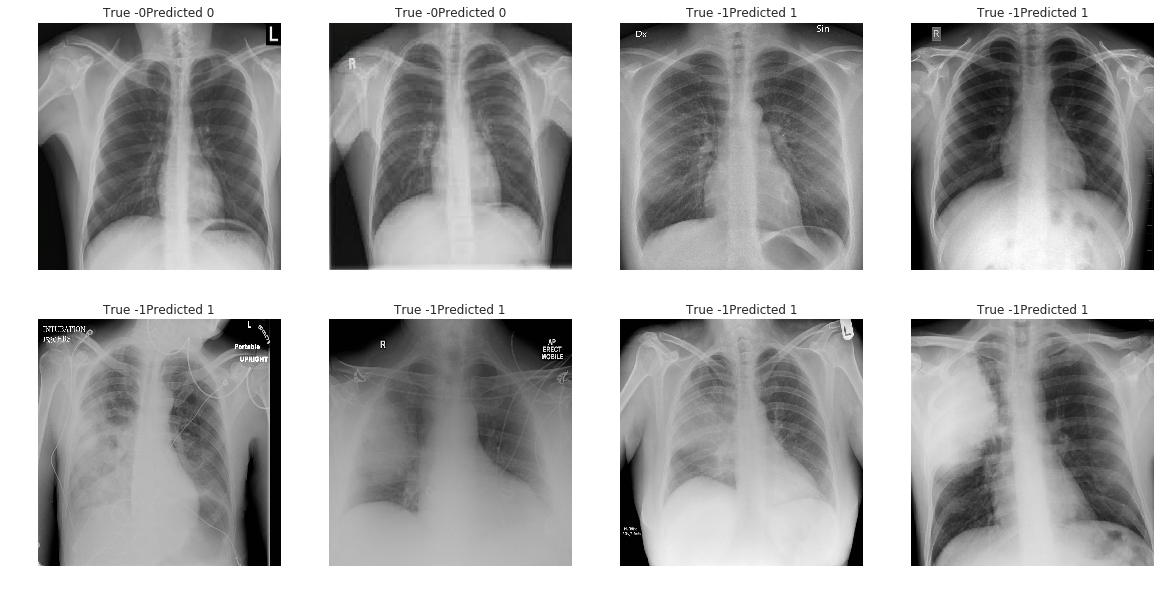

In [92]:
fig = plt.figure()
for i in range(len(web_df)):
    print(i)

    ax1 = fig.add_subplot(2,4,i+1)
    true = orig_test_labels[i]
    p = preds[i]
    #ax2 = fig.add_subplot(2,4,i+1)
    img1 =  mpimg.imread(web_images[i])
    ax1.imshow(img1)
    ax1.set_title("True -"+str(true) +"Predicted " + str(p))
    ax1.axis('off')
    ax1.set_aspect('auto')
    
fig.set_figheight(10)
fig.set_figwidth(20)

In [93]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes =True)